<a href="https://colab.research.google.com/github/sahanal-2603/CPP/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Long short-term memory (LSTM)**

**Multi-layer LSTM recurrent neural network to predict the last value of a sequence of values i.e. the TESLA stock price in this example.**

In [9]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

**Let’s load the data and inspect them:**

In [10]:
df=pd.read_csv("TSLA.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


The next step is to split the data into training and test sets to avoid overfitting and to be able to investigate the generalization ability of our model. To learn more about overfitting read this article:

The target value to be predicted is going to be the “Close” stock price value.

In [11]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

It’s a good idea to normalize the data before model fitting. This will boost the performance. You can read more here for the Min-Max Scaler:

Let’s build the input features with time lag of 1 day (lag 1):

In [12]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

**Build the model.** We will build the LSTM with 50 neurons and 4 hidden layers. Finally, we will assign 1 neuron in the output layer for predicting the normalized stock price. We will use the MSE loss function and the Adam stochastic gradient descent optimizer.

In [13]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 10s 127ms/step - loss: 0.0897
Epoch 2/100
24/24 [==============================] - 3s 130ms/step - loss: 0.0189
Epoch 3/100
24/24 [==============================] - 3s 126ms/step - loss: 0.0127
Epoch 4/100
24/24 [==============================] - 3s 121ms/step - loss: 0.0130
Epoch 5/100
24/24 [==============================] - 3s 122ms/step - loss: 0.0143
Epoch 6/100
24/24 [==============================] - 3s 123ms/step - loss: 0.0123
Epoch 7/100
24/24 [==============================] - 3s 124ms/step - loss: 0.0111
Epoch 8/100
24/24 [==============================] - 3s 124ms/step - loss: 0.0110
Epoch 9/100
24/24 [==============================] - 3s 124ms/step - loss: 0.0119
Epoch 10/100
24/24 [==============================] - 3s 124ms/step - loss: 0.0105
Epoch 11/100
24/24 [==============================] - 3s 123ms/step - loss: 0.0097
Epoch 12/100
24/24 [==============================] - 3s 122ms/step - loss: 0.0106
Epoch 13/100

Prepare the test data (reshape them):

In [14]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


Make Predictions using the test set

In [15]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

visualize the results now:

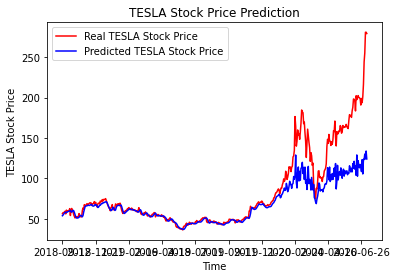

In [16]:
# Visualising the results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()